In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import sep
import math
import keras
from keras.utils import np_utils

import numpy as np
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from astropy import wcs
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

import random 
import aplpy
from astroquery.sdss import SDSS

from sklearn.metrics import accuracy_score

np.random.seed(123)  # for reproducibility

Using TensorFlow backend.


Downloading data

In [29]:
data_galaxy = np.load('galaxy_ic4559_images.npy')
labels_galaxy = np.load('galaxy_ic4559_labels.npy')
data_sim = np.load('data_sim_images.npy')
labels_sim = np.load('data_sim_labels.npy')

/home/kasiawardega/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


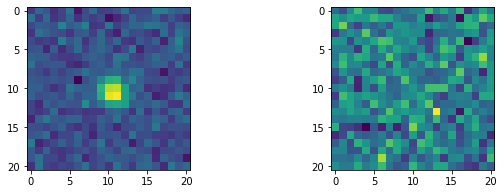

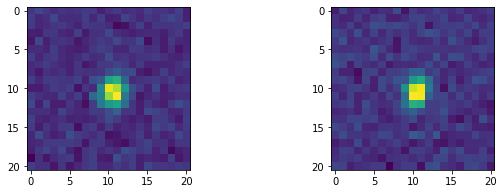

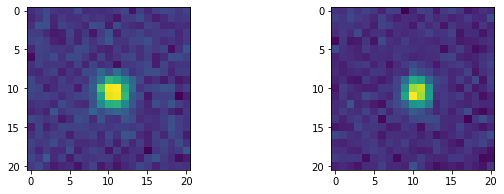

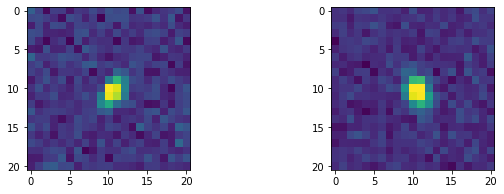

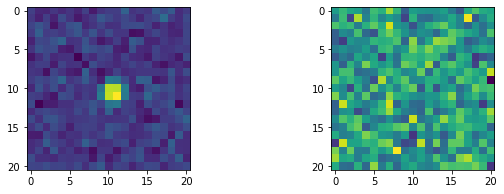

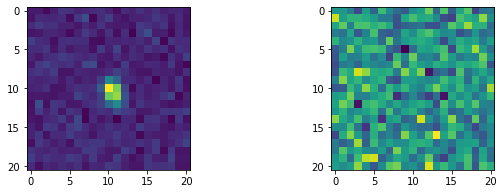

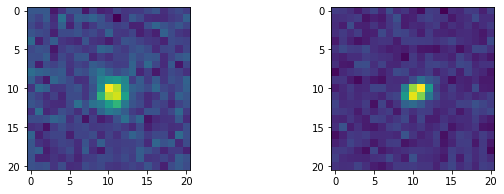

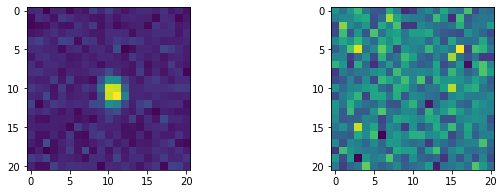

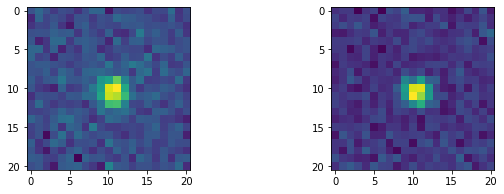

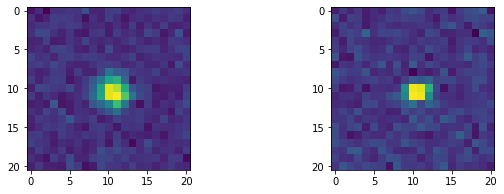

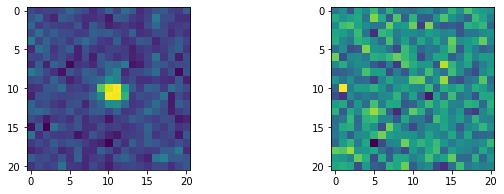

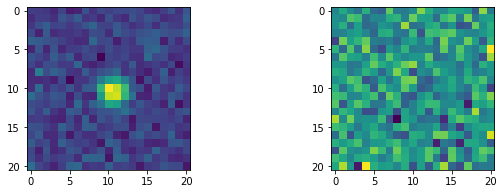

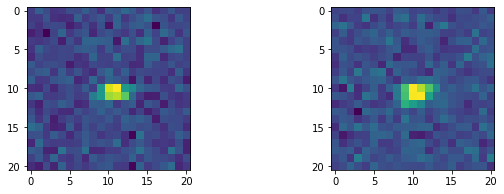

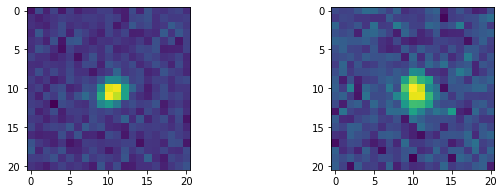

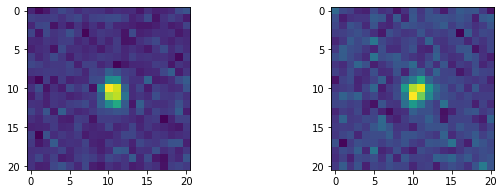

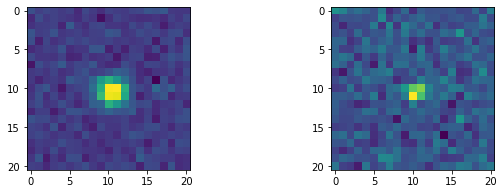

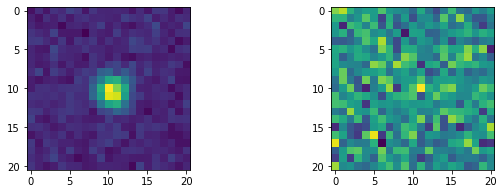

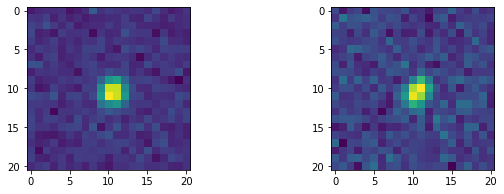

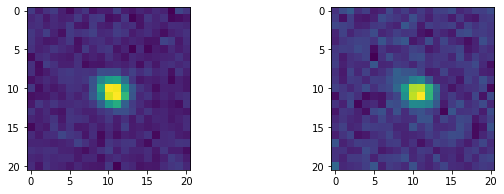

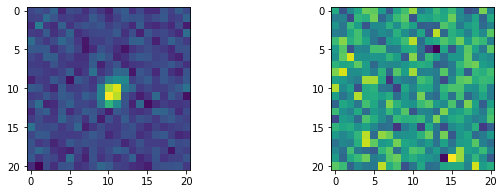

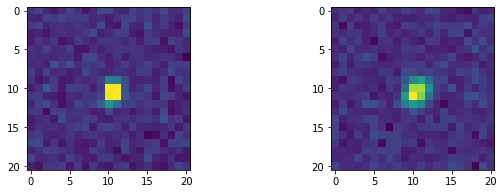

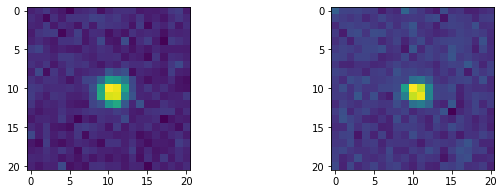

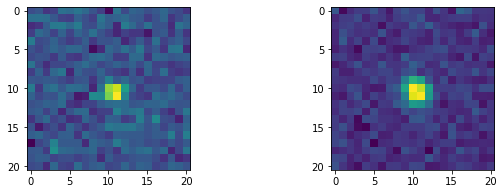

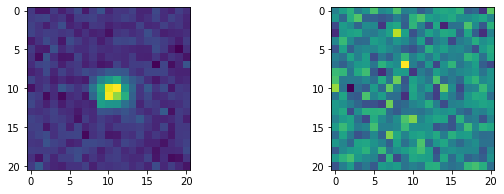

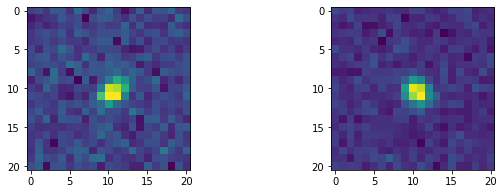

In [72]:
#SAMPLES OF SIMULATED DATA

for i in range(25):
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(data_sim[i,:,:,0])
    ax2.imshow(data_sim[i,:,:,1])

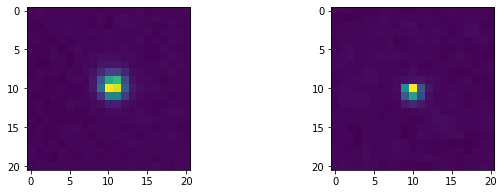

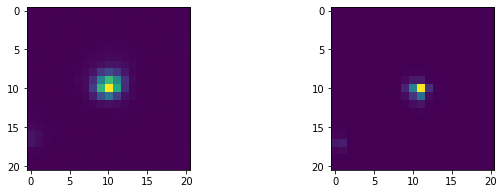

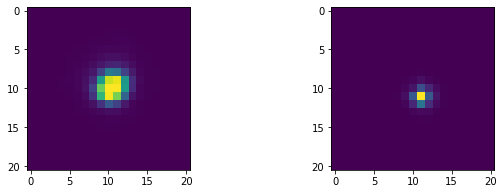

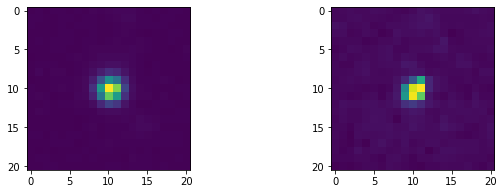

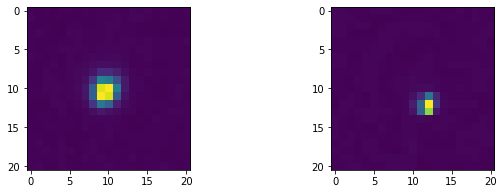

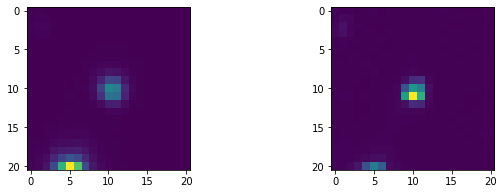

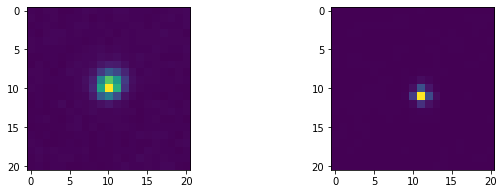

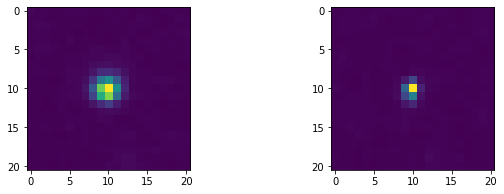

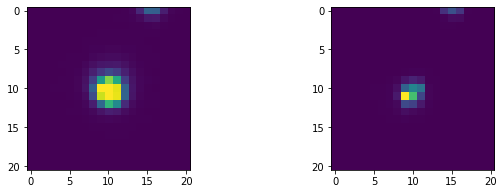

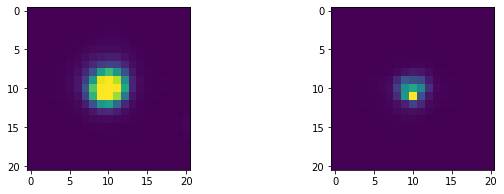

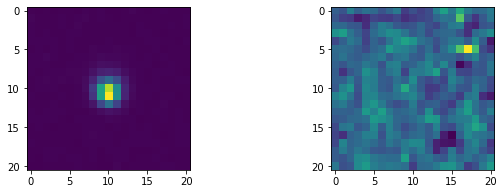

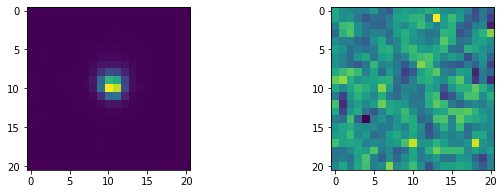

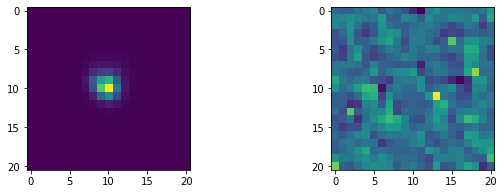

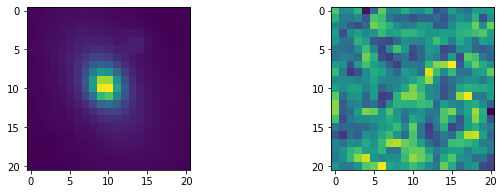

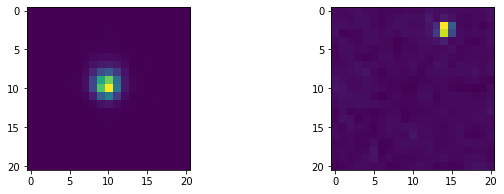

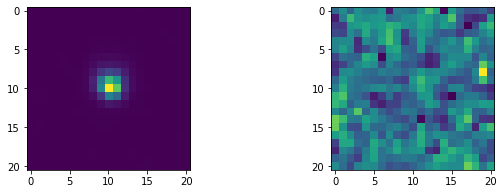

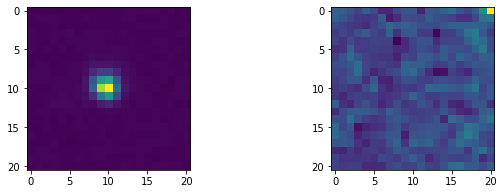

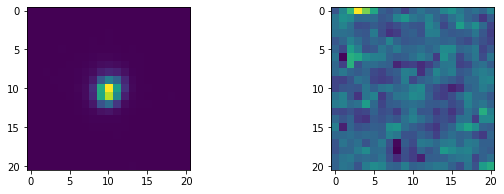

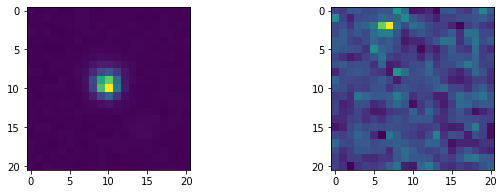

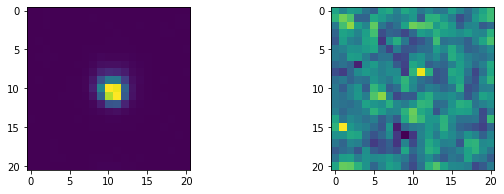

In [75]:
#SAMPLES OF REAL DATA

for i in range(10):
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(data_galaxy[i,:,:,0])
    ax2.imshow(data_galaxy[i,:,:,1])
    
    
for i in range(400,410):
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(data_galaxy[i,:,:,0])
    ax2.imshow(data_galaxy[i,:,:,1])    

Spliting data to train set and test set

In [77]:
data_sim_train = data_sim[0:8000, :,:,:]
data_sim_test = data_sim[8000:10000,:,:,:]
labels_sim_train = labels_sim[0:8000]
labels_sim_test = labels_sim[8000:10000]

In [78]:
#we need to transform labels to format (N,2) - now is only (N,1)

In [79]:
labels_train_2 = np_utils.to_categorical(labels_sim_train)
labels_test_2 = np_utils.to_categorical(labels_sim_test)

CNN - one input

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv3D, MaxPooling2D, Dropout

In [81]:
#create model
model1 = Sequential()
#add model layers
model1.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(21,21,2)))
model1.add(Conv2D(5, kernel_size=3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(3,3)))
model1.add(Dropout(0.25))
model1.add(Conv2D(3, kernel_size=3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(2, activation='softmax'))

In [82]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 19, 19, 10)        190       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 17, 17, 5)         455       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 5)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 3)           138       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 3)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3)                

In [83]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
model1.fit(data_sim_train, labels_train_2, validation_data=(data_sim_test, labels_test_2), epochs=20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 2s 244us/step - loss: 0.5212 - accuracy: 0.7598 - val_loss: 0.0248 - val_accuracy: 0.9995
Epoch 2/20
8000/8000 [==============================] - 1s 157us/step - loss: 0.0592 - accuracy: 0.9871 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 3/20
8000/8000 [==============================] - 1s 157us/step - loss: 0.0308 - accuracy: 0.9925 - val_loss: 4.5193e-04 - val_accuracy: 1.0000
Epoch 4/20
8000/8000 [==============================] - 1s 158us/step - loss: 0.0232 - accuracy: 0.9951 - val_loss: 6.2541e-05 - val_accuracy: 1.0000
Epoch 5/20
8000/8000 [==============================] - 1s 158us/step - loss: 0.0173 - accuracy: 0.9965 - val_loss: 5.5555e-04 - val_accuracy: 1.0000
Epoch 6/20
8000/8000 [==============================] - 1s 158us/step - loss: 0.0217 - accuracy: 0.9955 - val_loss: 3.6931e-04 - val_accuracy: 1.0000
Epoch 7/20
8000/8000 [==============================] - 1s 1

In [85]:
labels_test_predict = model1.predict(data_sim_test)

In [23]:
#labels_predict = np.round(labels_predict)

In [24]:
#labels_predict = labels_predict.astype(int)

In [86]:
labels_test_predict[0:200]

array([[1.53005647e-03, 9.98469889e-01],
       [3.14766052e-03, 9.96852338e-01],
       [1.00000000e+00, 1.87639194e-26],
       [1.00000000e+00, 1.08465692e-24],
       [1.19596545e-03, 9.98804092e-01],
       [1.00000000e+00, 2.25028084e-21],
       [1.37070565e-05, 9.99986291e-01],
       [1.00000000e+00, 1.19514943e-17],
       [4.19906355e-05, 9.99958038e-01],
       [2.84744805e-04, 9.99715269e-01],
       [4.76577668e-04, 9.99523401e-01],
       [3.63658008e-04, 9.99636292e-01],
       [7.03606231e-04, 9.99296427e-01],
       [7.24923157e-04, 9.99275029e-01],
       [1.37935291e-04, 9.99862075e-01],
       [2.46380619e-03, 9.97536182e-01],
       [1.32680207e-05, 9.99986768e-01],
       [3.57850840e-05, 9.99964237e-01],
       [6.03077242e-05, 9.99939680e-01],
       [1.00000000e+00, 5.92534354e-17],
       [1.00000000e+00, 2.24136421e-12],
       [1.73024800e-05, 9.99982715e-01],
       [1.00000000e+00, 1.24885132e-17],
       [1.00000000e+00, 4.14474877e-27],
       [1.000000

In [61]:
labels_predict2 = np.argmax(labels_test_predict, axis=-1)

In [62]:
labels_predict2

array([1, 1, 0, ..., 1, 0, 1])

In [87]:
labels_test_2[0:200]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [88]:
labels_test_2 = np.argmax(labels_test_2, axis=-1)

In [89]:
accuracy_score(labels_test_2, labels_predict2)

1.0

In [90]:
labels_galaxy_pred = model1.predict(data_galaxy)

In [91]:
labels_galaxy_pred

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [64]:
#galaxy_labels = np.round(galaxy_labels)
#galaxy_labels = galaxy_labels.astype(int)

In [93]:
labels_galaxy_pred[350:550]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [94]:
labels_pred_model1 = np.argmax(labels_galaxy_pred, axis=-1)

In [95]:
labels_pred_model1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [96]:
accuracy_score(labels_galaxy, labels_pred_model1)

0.5